In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Função para pré-processar a imagem


In [3]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (256, 256))  # Redimensione para a entrada do modelo
    image_normalized = image_resized / 255.0  # Normaliza a imagem
    return image, image_normalized

# Carregar a imagem original e pré-processada

In [6]:
image_path = 'img.png'
original_image, processed_image = preprocess_image(image_path)

# Exemplo de segmentação simples usando K-means (sem CNN)
# Convertendo a imagem para o espaço de cores LAB para melhorar a segmentação

In [7]:
lab_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2LAB)
lab_image = lab_image.reshape((-1, 3))

# Aplicando K-means para segmentar a imagem em clusters de cores (n_clusters ajustável)

In [15]:
n_clusters = 3  # Ajuste para quantos tipos de vegetação (cores) você espera
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(lab_image)
segmented_img = kmeans.labels_.reshape(original_image.shape[:2])

# Função para mostrar a segmentação na imagem

In [16]:
def display_segmentation(image, segmented_img):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title("Imagem Original")
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title("Segmentação de Vegetação")
    plt.imshow(segmented_img, cmap='viridis')
    plt.axis('off')
    plt.show()

# Mostrar resultado da segmentação

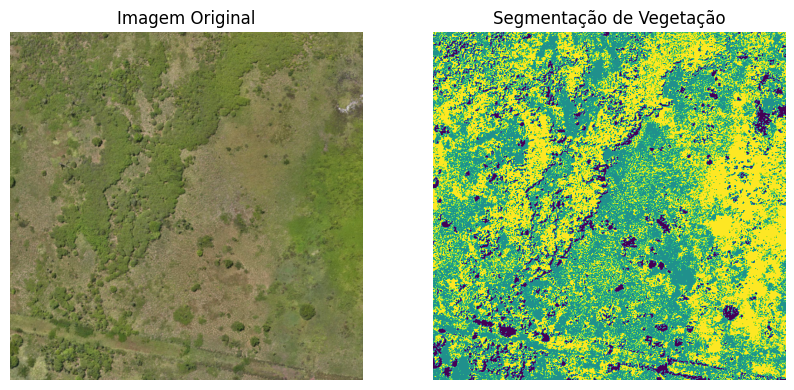

In [17]:
display_segmentation(original_image, segmented_img)

# Demarcar os clusters com contornos

In [18]:
def draw_contours(image, segmented_img):
    # Converta cada cluster em uma máscara binária
    for i in range(n_clusters):
        mask = np.where(segmented_img == i, 255, 0).astype(np.uint8)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Desenhe os contornos na imagem original para visualização
        cv2.drawContours(image, contours, -1, (255, 0, 0), 2)  # Borda em azul
    return image

In [19]:
image_with_contours = draw_contours(original_image.copy(), segmented_img)

# Exibir imagem com contornos

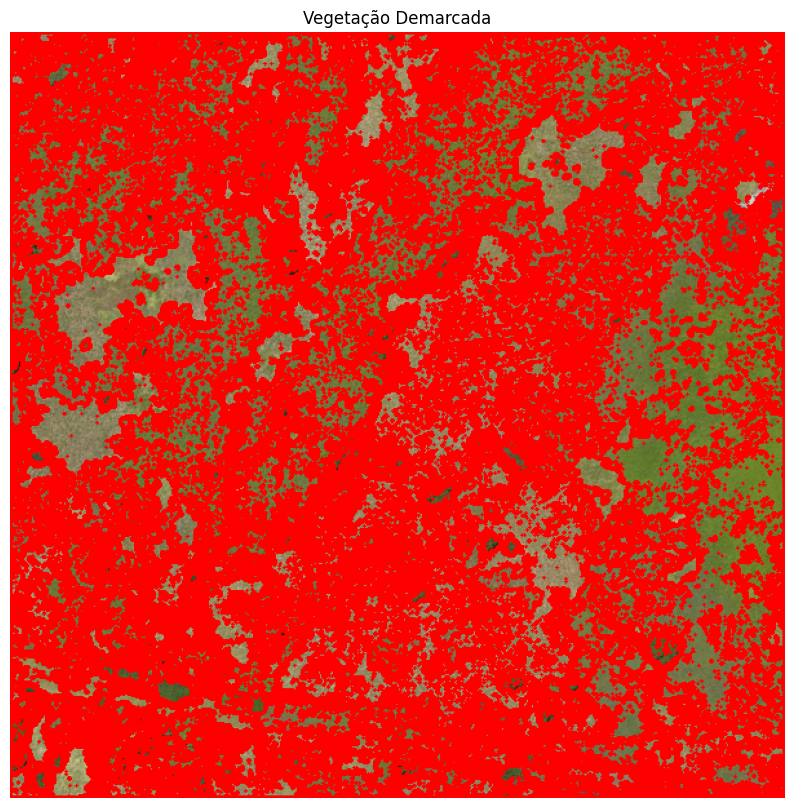

In [20]:
plt.figure(figsize=(10, 10))
plt.title("Vegetação Demarcada")
plt.imshow(image_with_contours)
plt.axis('off')
plt.show()